In [57]:
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

import rasterio as rio
import numpy as np

import matplotlib.cm as matcm

In [9]:
BAND_PATH = 'raster2clip.tif'

In [15]:
with rio.open(BAND_PATH, 'r') as fin:
    arr = fin.read(1)
    meta = fin.meta

In [16]:
arr

array([[ 70.,  70.,  70., ...,  84.,  82.,  82.],
       [ 69.,  70.,  70., ...,  83.,  81.,  81.],
       [ 69.,  70.,  70., ...,  81.,  79.,  79.],
       ...,
       [529., 524., 524., ..., 152., 152., 152.],
       [535., 531., 531., ..., 152., 152., 152.],
       [542., 536., 536., ..., 153., 153., 153.]], dtype=float32)

In [17]:
meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 3.4028234663852886e+38,
 'width': 4534,
 'height': 4547,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00027778110476400547, 0.0, 16.174576264,
        0.0, -0.00027777423883879526, 52.090062733)}

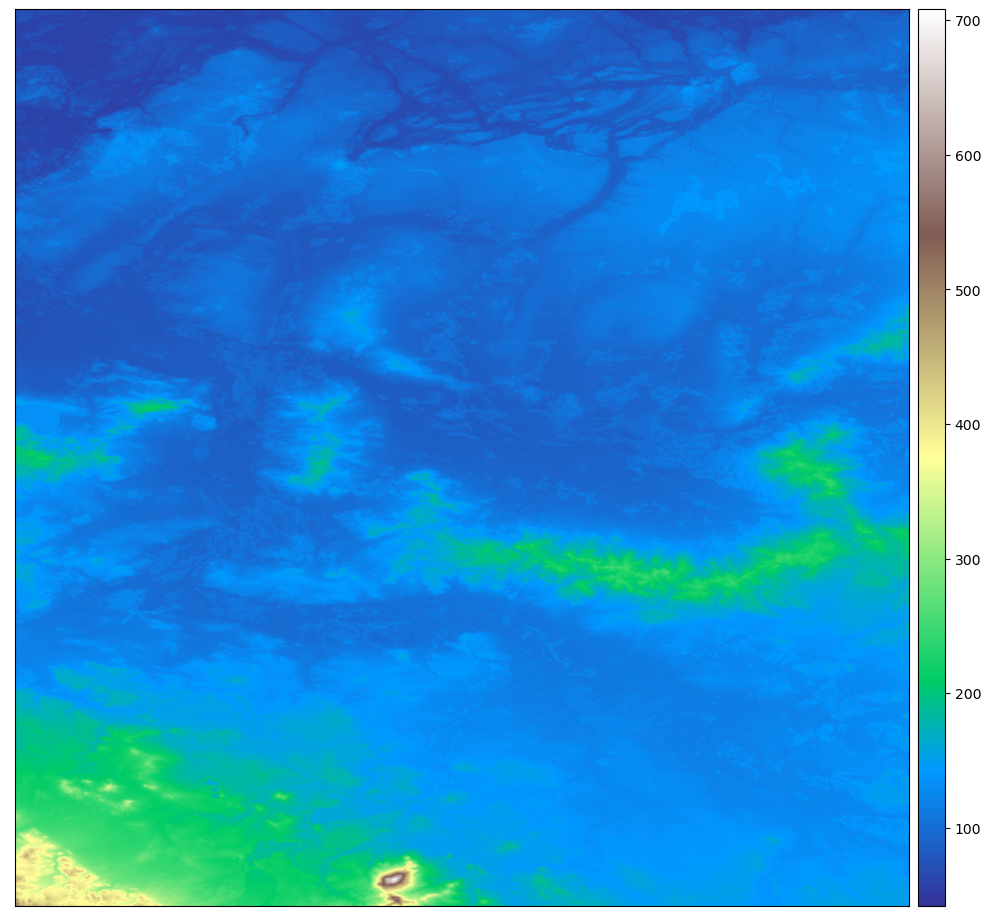

<AxesSubplot:>

In [21]:
ep.plot_bands(arr, cmap='terrain', cbar=True)

In [59]:
# Generate test mask

# Generate array of random ints
sample_arr = np.random.randint(low=0, high=1000, size=tuple(arr.shape))

# Binarize it (only values 0 and 1)
sample_arr[sample_arr < 998] = 1
sample_arr[sample_arr >= 998] = 0
sample_arr[200:250, :] = 0
sample_arr[:, 601] = 0
sample_arr[800:1000, 2000:2020] = 0

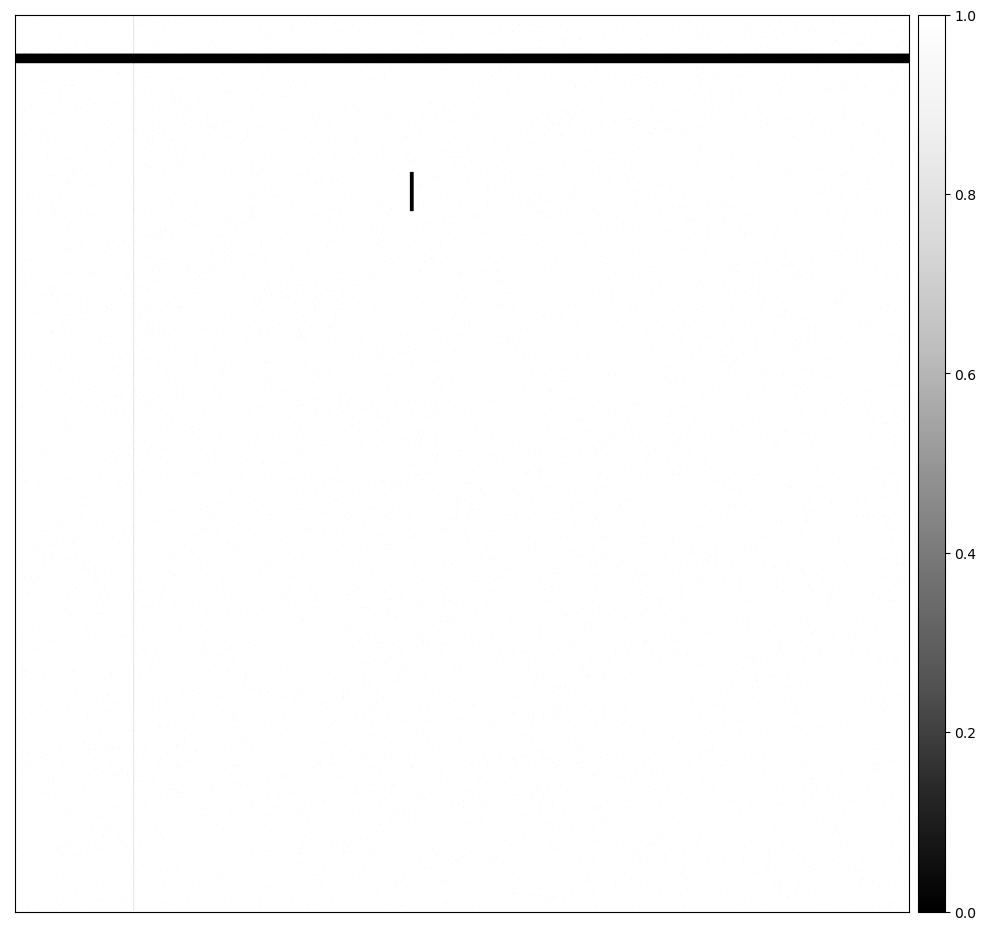

<AxesSubplot:>

In [60]:
ep.plot_bands(sample_arr)

In [61]:
masked = arr * sample_arr
masked[masked == 0] = np.nan

In [62]:
arr_ma = em.mask_pixels(arr, sample_arr, vals=[0])

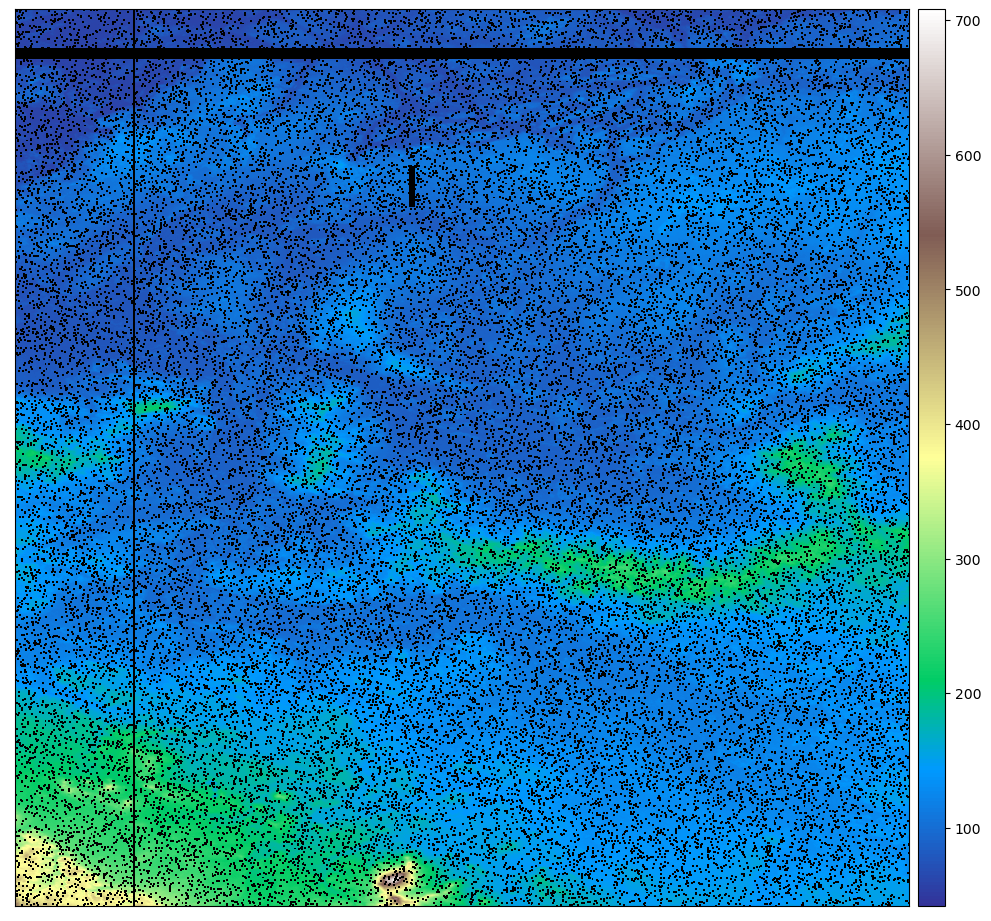

<AxesSubplot:>

In [64]:
my_cmap = matcm.get_cmap("terrain").copy()
my_cmap.set_bad(color='black')
ep.plot_bands(arr_ma, cmap=my_cmap, cbar=True)

---

# Process step by step

1. Read bands, ensure that both bands have the same extent, CRS and resolution.
2. Transform mask band to 0-1 int array (or False-True). The best idea to use numpy array indexing here and set some thresholds or conditions.
3. Multiply mask with the core band (it's a "normal" mathematical multiplication - every pixel multiplied by 0 gives zero, and every pixel multiplied by 1 resturns it's value as it is).
4. Transform zeros to `np.nan`.
5. Modify colormap, set `nan` to specific color.
6. Plot data.